In [23]:
import sys
import os
import datetime
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

path_main_folder = '/home/antorosi/Documents/AutoEncoder'
sys.path.append(path_main_folder)

from conso.load_shape_data import *  


### Load and shape data 

In [2]:
# Load raw data
path_data = os.path.join(path_main_folder, 'data')
dict_data_conso = load_data_conso(path_data)

In [3]:
meteo_df= dict_data_conso['meteo']

In [4]:
# Get hourly points only
mask = meteo_df['ds'].dt.minute == 0
meteo_df = meteo_df[mask]
meteo_df = meteo_df.reset_index(drop=True)

### Analysis

In [54]:
#list(meteo_df.columns)

In [20]:
# Correlation
meteo_df.set_index('ds')
matrix_corr = meteo_df.corr().as_matrix()

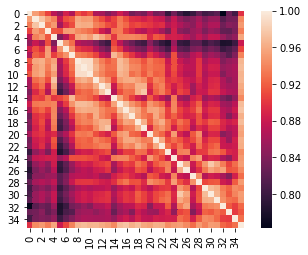

In [23]:
# Heat map
sn.heatmap(matrix_corr,vmax=1, square=True,annot=False)

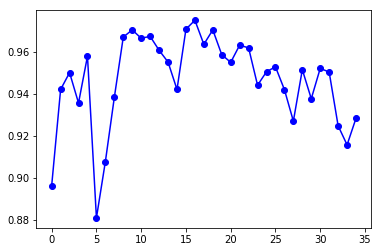

In [28]:
# Correlation of the mean temp with the stations
plt.plot(matrix_corr[-1,:-1], '-ob')
plt.show()

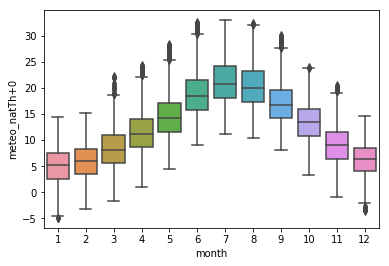

In [8]:
# Evolution of the mean temperature by month
month = meteo_df['ds'].dt.month
meteo_df['month'] = month

sn.boxplot(x="month", y="meteo_natTh+0", data=meteo_df)

In [54]:
# Get dayly mean temperature
day_count = (meteo_df['ds'] - meteo_df['ds'][0]).apply(lambda td: td.days)
meteo_df['day'] = day_count

In [10]:
mean_meteo_df = pd.DataFrame(meteo_df.groupby(['day']).mean())

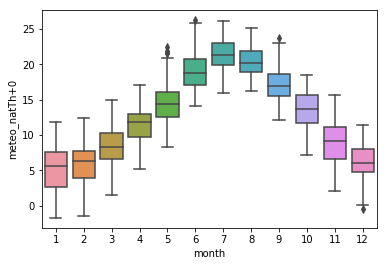

In [11]:
sn.boxplot(x="month", y="meteo_natTh+0", data=mean_meteo_df)

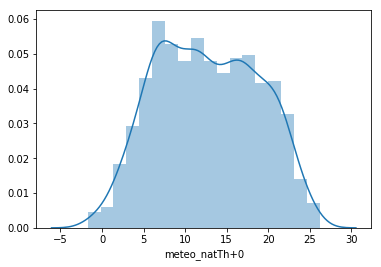

In [22]:
sn.distplot(mean_meteo_df['meteo_natTh+0'])

In [ ]:
mean_nat_meteo_df = mean_meteo_df[['meteo_natTh+0', 'month']]

In [51]:
#scaler = StandardScaler(with_mean=True, with_std=True)
scaler = MinMaxScaler()

scalerfit = scaler.fit(np.array(mean_nat_meteo_df['meteo_natTh+0']).reshape(-1,1))

col_normalized = scalerfit.transform(np.array(mean_nat_meteo_df['meteo_natTh+0']).reshape(-1,1))

mean_nat_meteo_n_df = mean_nat_meteo_df.copy()
mean_nat_meteo_n_df['meteo_natTh+0'] = col_normalized.reshape(-1,1)


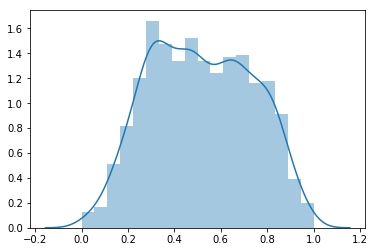

In [52]:
sn.distplot(col_normalized)